In [1]:
import pySRProxy

In [2]:
rdr = pySRProxy.StandardRecordFileReader("cafmaker/cafTree",
        ["/root/scratch/DUNE/FDInputs2024/VDProd/fardet-vd_mc_list-merge_physics_cafmaker_dunevd10kt_1x8x6_3view_30deg_runreco-nuenergy_geov3_root-tuple_merged_skip000000_lim000060_final_20241024T024241.root",])


Warning in <TClass::Init>: no dictionary for class genie::NtpMCEventRecord is available
Warning in <TClass::Init>: no dictionary for class genie::NtpMCRecordI is available
Warning in <TClass::Init>: no dictionary for class genie::NtpMCRecHeader is available
Warning in <TClass::Init>: no dictionary for class genie::EventRecord is available
Warning in <TClass::Init>: no dictionary for class genie::GHepRecord is available
Warning in <TClass::Init>: no dictionary for class genie::Interaction is available
Warning in <TClass::Init>: no dictionary for class genie::InitialState is available
Warning in <TClass::Init>: no dictionary for class genie::Target is available
Warning in <TClass::Init>: no dictionary for class genie::ProcessInfo is available
Warning in <TClass::Init>: no dictionary for class genie::Kinematics is available
Warning in <TClass::Init>: no dictionary for class pair<genie::EKineVar,double> is available
Warning in <TClass::Init>: no dictionary for class genie::XclsTag is avail

In [3]:
a = rdr.entry(0)
print("pandora:",[ x for x in dir(a.common.ixn.pandora[0]) if x[0] != "_"])
print("pandora.Enu:",[ x for x in dir(a.common.ixn.pandora[0].Enu) if x[0] != "_"])
print("pandora.vtx:",[ x for x in dir(a.common.ixn.pandora[0].vtx) if x[0] != "_"])
print("pandora.nuhyp:",[ x for x in dir(a.common.ixn.pandora[0].nuhyp) if x[0] != "_"])
print("pandora.nuhyp.cvn:", [ x for x in dir(a.common.ixn.pandora[0].nuhyp.cvn) if x[0] != "_"])


print(a.common.ixn.pandora[0].truth.at(0))

pandora: ['Enu', 'dir', 'id', 'nuhyp', 'part', 'truth', 'truthOverlap', 'vtx']
pandora.Enu: ['calo', 'e_calo', 'lep_calo', 'mu_mcs', 'mu_range', 'regcnn']
pandora.vtx: ['x', 'y', 'z']
pandora.nuhyp: ['cvn']
pandora.nuhyp.cvn: ['chgpi0', 'chgpi1', 'chgpi2', 'chgpiN', 'isnubar', 'nc', 'neutron0', 'neutron1', 'neutron2', 'neutronN', 'nue', 'numu', 'nutau', 'pizero0', 'pizero1', 'pizero2', 'pizeroN', 'protons0', 'protons1', 'protons2', 'protonsN']


0


In [13]:
events = { "vtxx": [], "vtxy": [],"vtxz": [], "cvnnue": [], "cvnnumu": [], "cvnnc": [],
         "true_nupdg": [], "true_iscc": [], "true_enu_GeV": [], "true_vtxx": [], "true_vtxy": [], "true_vtxz": []}
for i,ent in enumerate(rdr):
    for inx in ent.common.ixn.pandora:
        events["vtxx"].append(inx.vtx.x)
        events["vtxy"].append(inx.vtx.y)
        events["vtxz"].append(inx.vtx.z)
        
        events["cvnnue"].append(inx.nuhyp.cvn.nue)
        events["cvnnumu"].append(inx.nuhyp.cvn.numu)
        events["cvnnc"].append(inx.nuhyp.cvn.nc)

        #FD so we know there is only 1 int/spill, don't need fancy truth matching
        trueint = ent.mc.nu[0]

        events["true_nupdg"].append(trueint.pdg)
        events["true_iscc"].append(trueint.iscc)
        events["true_enu_GeV"].append(trueint.E)
        events["true_vtxx"].append(trueint.vtx.x)
        events["true_vtxy"].append(trueint.vtx.y)
        events["true_vtxz"].append(trueint.vtx.z)

    # if i > 100:
    #     break

In [14]:
import pandas as pd

df = pd.DataFrame(events)

In [15]:
df

,vtxx,vtxy,vtxz,cvnnue,cvnnumu,cvnnc,true_nupdg,true_iscc,true_enu_GeV,true_vtxx,true_vtxy,true_vtxz
0,266.329163,-238.183685,264.626617,0.001419,0.983378,0.013947,14,True,3.525392,266.027527,-238.412903,264.277435
1,103.294914,661.857056,168.547195,0.003260,0.985256,0.010998,14,True,4.479316,103.064720,661.718750,168.293182
2,-68.737213,593.285828,1.169922,0.005930,0.958681,0.010558,14,True,2.936577,-66.420662,590.642944,-13.778516
3,-163.962616,-192.257309,147.996628,0.002540,0.978156,0.014386,14,True,3.782442,-163.943253,-192.579483,148.527847
4,-62.427994,359.248505,45.753056,0.001389,0.004870,0.991805,14,False,1.750327,-64.946869,357.434601,36.398750
...,...,...,...,...,...,...,...,...,...,...,...,...
545008,138.656479,-5.480026,376.897369,0.001579,0.005346,0.991328,14,False,3.306130,138.735352,-5.518766,376.617920
545009,187.361328,651.855469,463.641846,0.002086,0.013236,0.977724,14,False,3.779285,186.516830,652.174500,463.574890
545010,300.516815,139.685272,514.372070,0.007998,0.010229,0.979517,14,False,3.560216,300.432404,138.381775,514.202515
545011,17.147131,-652.038757,337.798218,0.011013,0.915359,0.071029,14,True,4.324965,16.970161,-652.192017,337.960815


In [16]:
df.to_parquet("FDInteractions.pq")

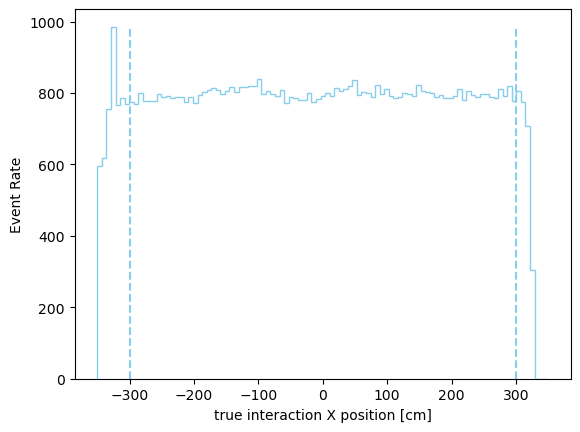

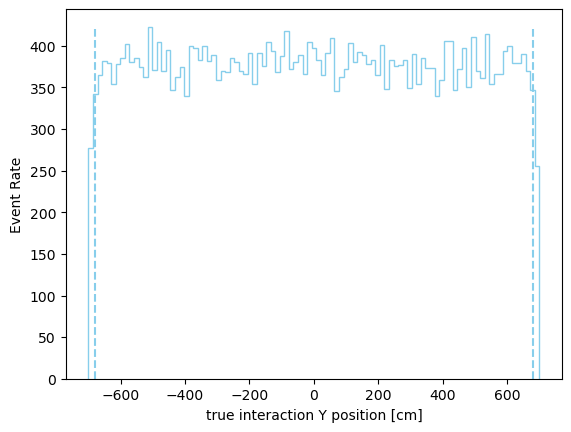

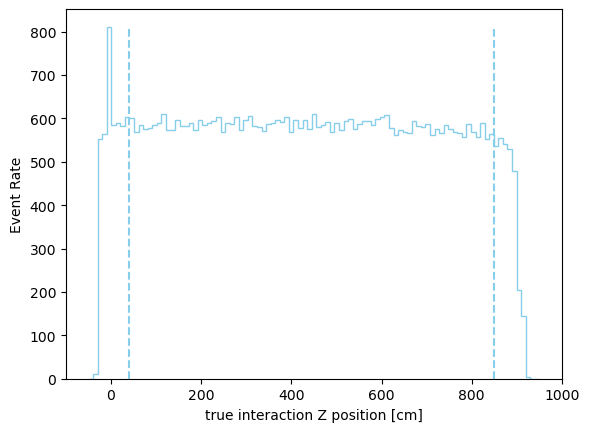

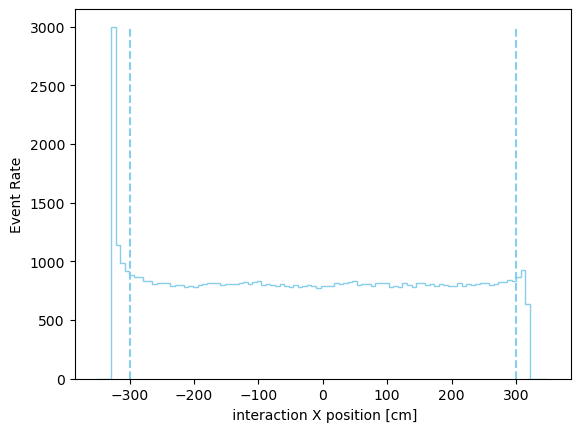

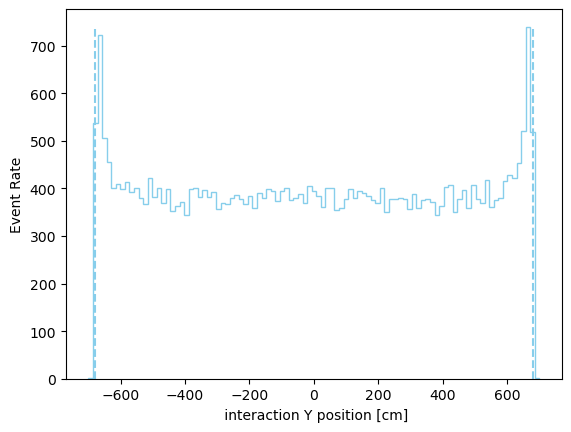

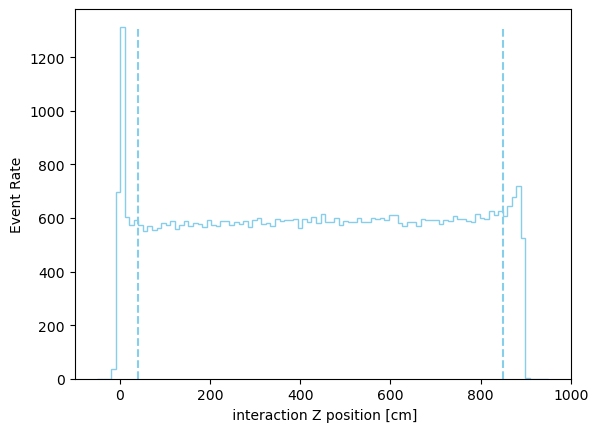

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def hist1d(data, bins):
    bin_vals, bins = np.histogram(data, bins=bins)
    bws = (bins[1:] - bins[:-1])

    return (bin_vals/bws, bins)

def drawhist1d(data, bins, cut_lines=None, **kwargs):

    counts, bins = hist1d(data, bins)
    plt.gca().stairs(counts, bins, **kwargs)
    if cut_lines is not None:
        plt.gca().plot([cut_lines[0],cut_lines[0]],[0,max(counts)], **kwargs, linestyle="dashed")
        plt.gca().plot([cut_lines[1],cut_lines[1]],[0,max(counts)], **kwargs, linestyle="dashed")

#draw training FV from https://github.com/DUNE/dunereco/blob/ff92d1bc966c6e3cf7db1a434c8a723e74b0712c/dunereco/CVN/art/CVNZlibMaker_module.cc#L295
# isFid = (fabs(vtx.X())<300 && fabs(vtx.Y())<680 && vtx.Z()>40 && vtx.Z()<850); // vd
drawhist1d(df["true_vtxx"], np.linspace(-350,350,100), [-300,300], color="skyblue")
plt.xlabel("true interaction X position [cm]")
plt.ylabel("Event Rate")
plt.show()

drawhist1d(df["true_vtxy"], np.linspace(-700,700,100), [-680,680], color="skyblue")
plt.xlabel("true interaction Y position [cm]")
plt.ylabel("Event Rate")
plt.show()

drawhist1d(df["true_vtxz"], np.linspace(-50,950,100), [40,850], color="skyblue")
plt.xlabel("true interaction Z position [cm]")
plt.ylabel("Event Rate")
plt.show()

drawhist1d(df["vtxx"], np.linspace(-350,350,100), [-300,300], color="skyblue")
plt.xlabel(" interaction X position [cm]")
plt.ylabel("Event Rate")
plt.show()

drawhist1d(df["vtxy"], np.linspace(-700,700,100), [-680,680], color="skyblue")
plt.xlabel(" interaction Y position [cm]")
plt.ylabel("Event Rate")
plt.show()

drawhist1d(df["vtxz"], np.linspace(-50,950,100), [40,850], color="skyblue")
plt.xlabel(" interaction Z position [cm]")
plt.ylabel("Event Rate")
plt.show()

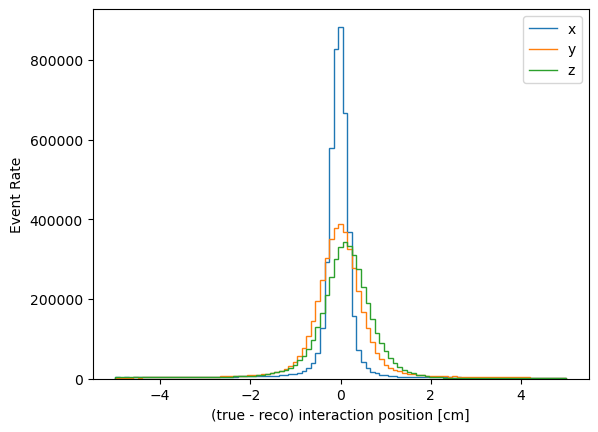

In [49]:
plt.stairs(*hist1d(df["true_vtxx"] - df["vtxx"], np.linspace(-5,5,100)), label="x")
plt.stairs(*hist1d(df["true_vtxy"] - df["vtxy"], np.linspace(-5,5,100)), label="y")
plt.stairs(*hist1d(df["true_vtxz"] - df["vtxz"], np.linspace(-5,5,100)), label="z")
plt.xlabel("(true - reco) interaction position [cm]")
plt.ylabel("Event Rate")
plt.legend()
plt.show()

In [51]:
def applyVDFV(df):
    return df[(abs(df["vtxx"]) < 300) & (abs(df["vtxy"]) < 680) & (df["vtxz"] > 40) & (df["vtxz"] < 680)]

dffv = applyVDFV(df)

In [52]:
dffv

,vtxx,vtxy,vtxz,cvnnue,cvnnumu,cvnnc,true_nupdg,true_iscc,true_enu_GeV,true_vtxx,true_vtxy,true_vtxz
0,266.329163,-238.183685,264.626617,0.001419,0.983378,0.013947,14,True,3.525392,266.027527,-238.412903,264.277435
1,103.294914,661.857056,168.547195,0.003260,0.985256,0.010998,14,True,4.479316,103.064720,661.718750,168.293182
3,-163.962616,-192.257309,147.996628,0.002540,0.978156,0.014386,14,True,3.782442,-163.943253,-192.579483,148.527847
4,-62.427994,359.248505,45.753056,0.001389,0.004870,0.991805,14,False,1.750327,-64.946869,357.434601,36.398750
5,-57.286697,242.243973,91.968773,0.001857,0.990286,0.006713,14,True,2.904292,-57.141781,241.917923,91.971939
...,...,...,...,...,...,...,...,...,...,...,...,...
545006,-75.869896,-10.463987,44.263458,0.001442,0.974448,0.018093,14,True,2.824683,-76.848473,-10.794485,41.947842
545008,138.656479,-5.480026,376.897369,0.001579,0.005346,0.991328,14,False,3.306130,138.735352,-5.518766,376.617920
545009,187.361328,651.855469,463.641846,0.002086,0.013236,0.977724,14,False,3.779285,186.516830,652.174500,463.574890
545011,17.147131,-652.038757,337.798218,0.011013,0.915359,0.071029,14,True,4.324965,16.970161,-652.192017,337.960815


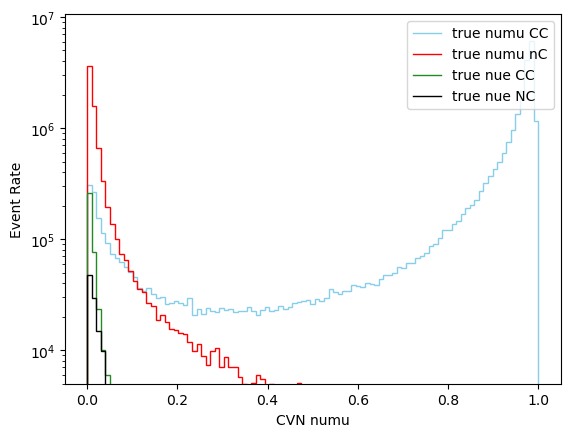

In [80]:
isnumu = abs(dffv["true_nupdg"]) == 14
isnue = abs(dffv["true_nupdg"]) == 12
iscc = dffv["true_iscc"]

drawhist1d(dffv[isnumu & iscc]["cvnnumu"], np.linspace(0,1,100), color="skyblue", label="true numu CC")
drawhist1d(dffv[isnumu & ~iscc]["cvnnumu"], np.linspace(0,1,100), color="red", label="true numu nC")
drawhist1d(dffv[isnue & iscc]["cvnnumu"], np.linspace(0,1,100), color="forestgreen", label="true nue CC")
drawhist1d(dffv[isnue & ~iscc]["cvnnumu"], np.linspace(0,1,100), color="black", label="true nue NC")

plt.xlabel("CVN numu")
plt.ylabel("Event Rate")
plt.legend()
plt.yscale('log')
plt.ylim(5E3)
plt.show()

In [93]:
def eff(df, reco_cuts, true_cuts):
    num = float(len(df[reco_cuts & true_cuts]))
    denom = float(len(df[true_cuts]))
    return num / denom if denom > 0 else 0

def pur(df, reco_cuts, true_cuts):
    num = float(len(df[reco_cuts & true_cuts]))
    denom = float(len(df[reco_cuts]))
    return num / denom if denom > 0 else 0

In [98]:
def cutopt(df, cutname, cut_range, true_cuts):
    x = np.linspace(cut_range[0],cut_range[1],50)
    yeff = [ eff(dffv, dffv[cutname] > cutv, true_cuts) for cutv in x ]
    ypur = [ pur(dffv, dffv[cutname] > cutv, true_cuts) for cutv in x ]
    yeffpur = [ yeff[i]*ypur[i] for i in range(50) ]

    plt.plot(x,yeff,label="efficiency")
    plt.plot(x,ypur,label="purity")
    plt.plot(x,yeffpur,label="eff*pur")
    plt.xlabel(f"{cutname} cut value")
    plt.legend()

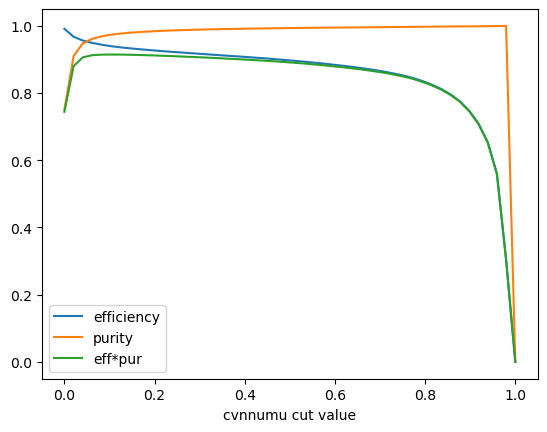

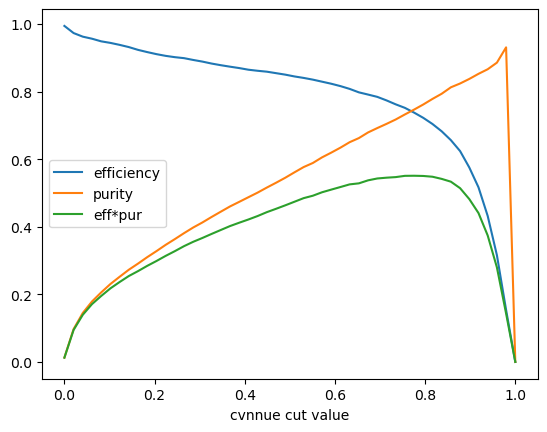

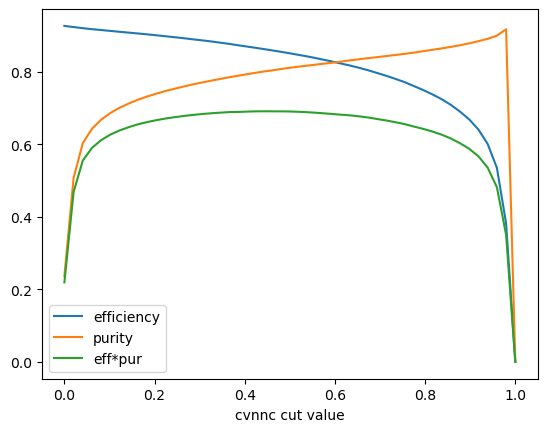

In [102]:
cutopt(dffv, "cvnnumu", [0,1], isnumu & iscc)
plt.show()
cutopt(dffv, "cvnnue", [0,1], isnue & iscc)
plt.show()
cutopt(dffv, "cvnnc", [0,1], ~iscc)